In [496]:
#Importing the necessary libraries.

#Dataframe & Calculations
import pandas as pd
import numpy as np

#Visaulizations
import seaborn as sns
import matplotlib.pyplot as plt

#For statistical calculations
import scipy.stats as stats

#Scaling
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [497]:
#Loading the dataset
df=pd.read_csv('k_circle_sales.csv')

In [498]:
#Reading the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [499]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.2,OUT045,2002,NaN,NaN,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1,OUT035,2004,Small,Tier1,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1,OUT018,2009,Medium,Tier 2,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.5,OUT046,1997,Small,Tier1,Supermarket Type1,765.6700


In [500]:
#Shape of the data
print(f'No of rows :{df.shape[0]}')
print(f'No of columns:{df.shape[1]}')

No of rows :8523
No of columns:12


In [501]:
#Checking for duplicate values:
df.duplicated().sum()
#The data does not have any duplicate values

0

In [502]:
#Checking for null values:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Three columns have null values:
 * Item_Weight =1463
 * Outlet_size=2410
 * Outlet_Location_Type=2050

In [606]:
#Five Point Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8193.0,12.880532,4.646519,4.555,8.785000,12.650000,16.850000,21.350000
Item_Visibility,8193.0,0.063221,0.046285,0.000,0.026818,0.052729,0.092783,0.195721
Item_MRP,8193.0,139.110326,61.518647,31.300,93.000000,140.800000,183.700000,266.900000
Item_Outlet_Sales,8193.0,2089.540121,1501.498356,33.290,857.550400,1783.678200,3020.068800,6478.234000


## Univariate Analysis
* It provides an understanding of the distribution of data.

In [503]:
# Numerical Variables
df_num=df.select_dtypes(include=np.number)
df_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8,1999,3735.1380
1,5.920,0.019278,48.3,2009,443.4228
2,17.500,0.016760,141.6,1999,2097.2700
3,19.200,0.000000,182.1,1998,732.3800
4,8.930,0.000000,53.9,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5,1987,2778.3834
8519,8.380,0.046982,108.2,2002,549.2850
8520,10.600,0.035186,85.1,2004,1193.1136
8521,7.210,0.145221,103.1,2009,1845.5976


In [504]:
#Categorical Variables
df_cat=df.select_dtypes(include='object')
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 2,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 2,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,NaN,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,NaN,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier1,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 2,Supermarket Type2


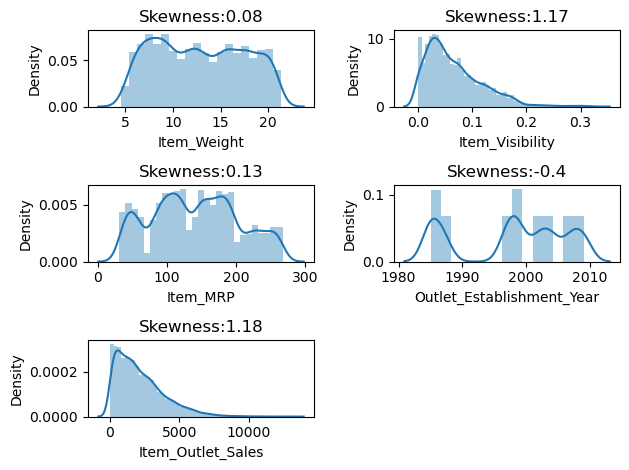

In [505]:
#Creating Distribution plots.
t=1
for i in df_num:
    plt.subplot(3,2,t)
    sns.distplot(df_num[i])
    plt.title(f'Skewness:{np.round(df_num[i].skew(),2)}')
    t+=1
    plt.tight_layout()

#### Inferences:
* Columns Item_Weight & Item_MRP are approx.symmetric.(-0.50 - 0.50)
* Columns Item_Visibility & Item_Sales are highly skewed, thus indicating presence of outliers.( > 1)

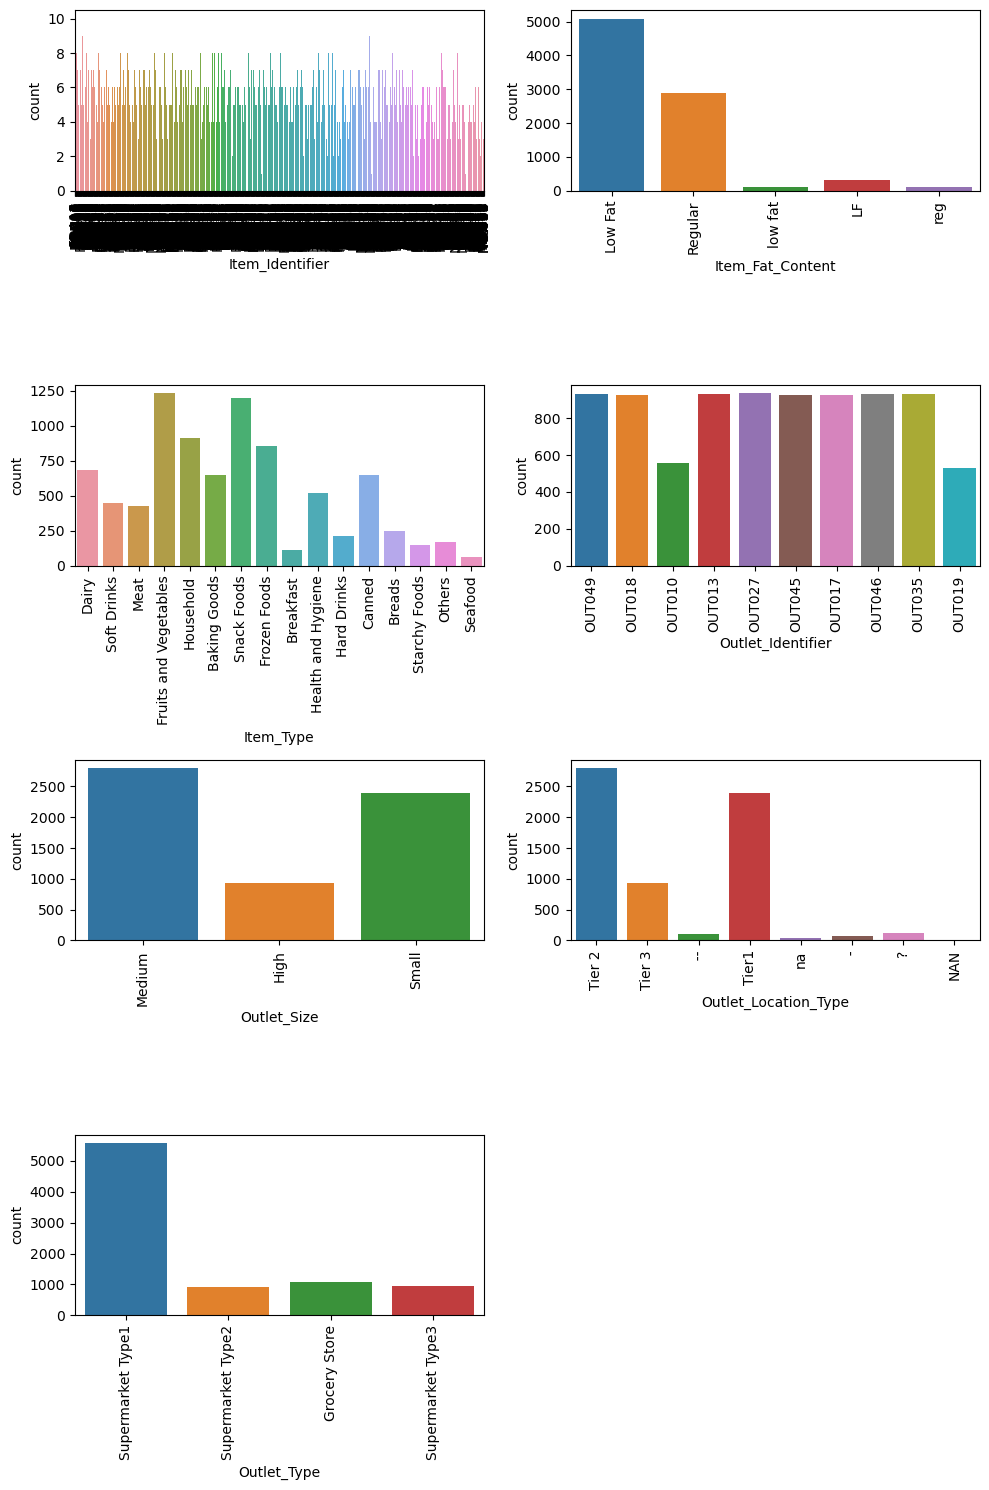

In [506]:
# Creating Count Plots for Categorical Variables
plt.figure(figsize=(10,15))
t=1
for i in df_cat:
    plt.subplot(4,2,t)
    sns.countplot(x=df_cat[i])
    t+=1
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

#### Inferences:
* Highest count in Item_Fat_Content is that of Low_Fat.
* Highest count in Item_Type is Fruits and Vegetables,Snack Foods,Household,Frozen Foods.
* Highest count in Outlet_Size is Medium.
* Highest count in Outlet_Location_Type is Tier 2.
* Highest count in Outlet_Type is Supermarket Type1.

## Bivariate Analysis
* It provides an understanding of the relationship between features.

<Axes: >

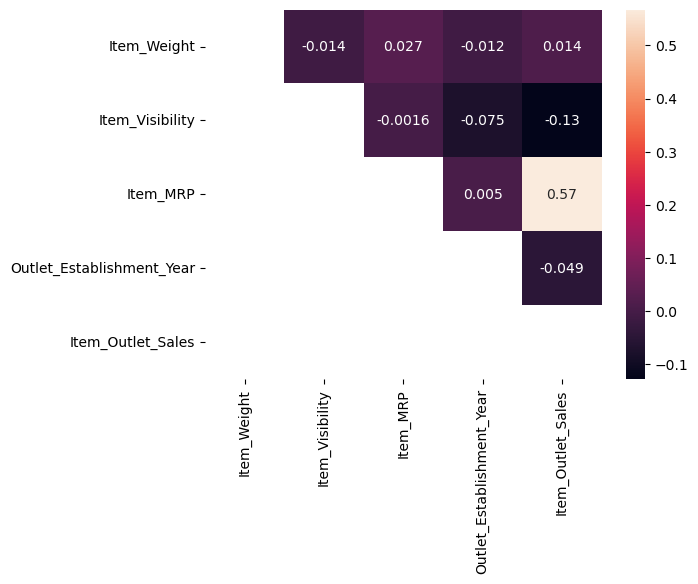

In [507]:
#Heat-map to understand the correlation
sns.heatmap(df_num.corr(),annot=True,mask=np.tril(df_num.corr()))

* Inferences: Item_MRP and Item_Outlet_Sales are highly correlated.

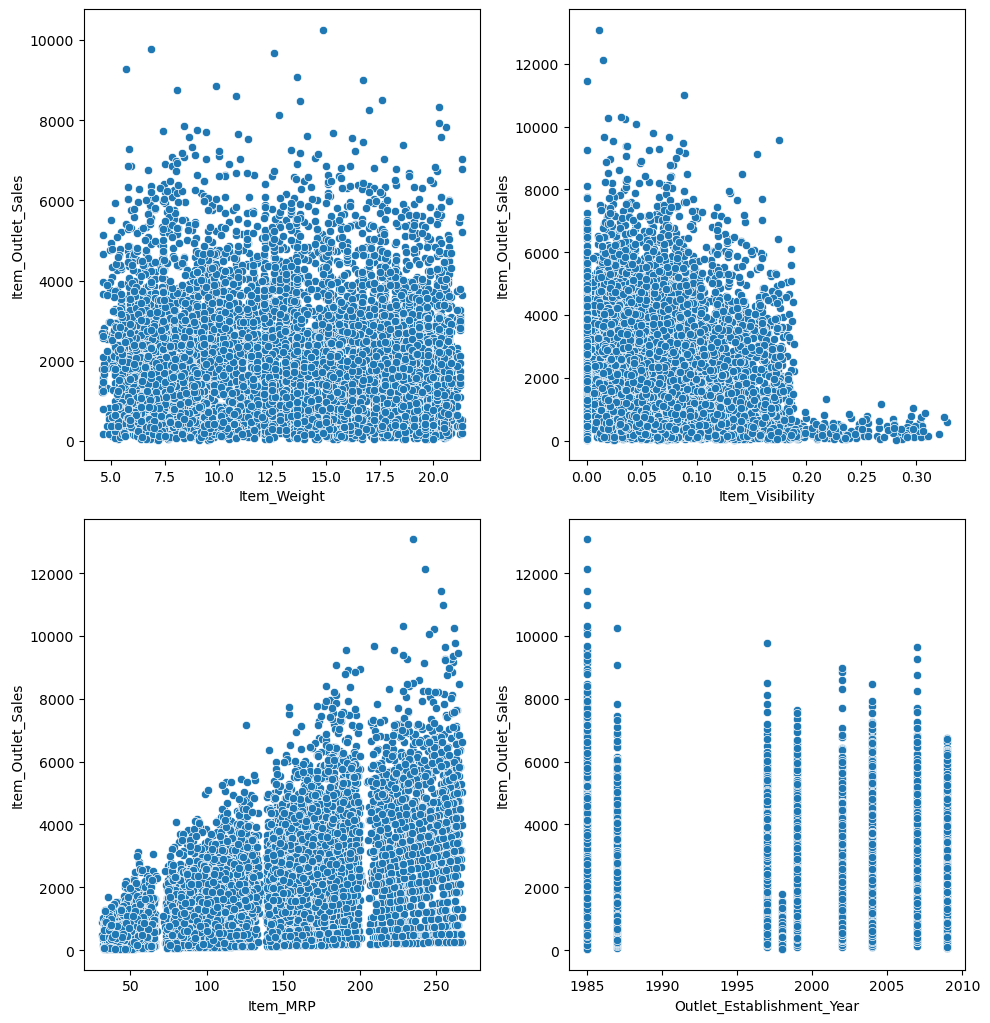

In [508]:
#Numeric vs Numeric
plt.figure(figsize=(10,15))
t=1
for i in df_num:
    if i != 'Item_Outlet_Sales':
        plt.subplot(3,2,t)
        sns.scatterplot(y=df['Item_Outlet_Sales'],x=df_num[i])
        t+=1
        plt.tight_layout()
    

* Inferences:
    * For Outlet_Sales below 4000 the Item_Weights are fairly distibuted,after which we see a decreasing trend, above 8000 has         representation of only few weights.
    * There seems some anomaly in Item_Visibility wherein products with 0 visibility showcasing High Outlet Sales.
    * There seems some kind of baskets in Item_MRP corresponding to the Item_Sales.

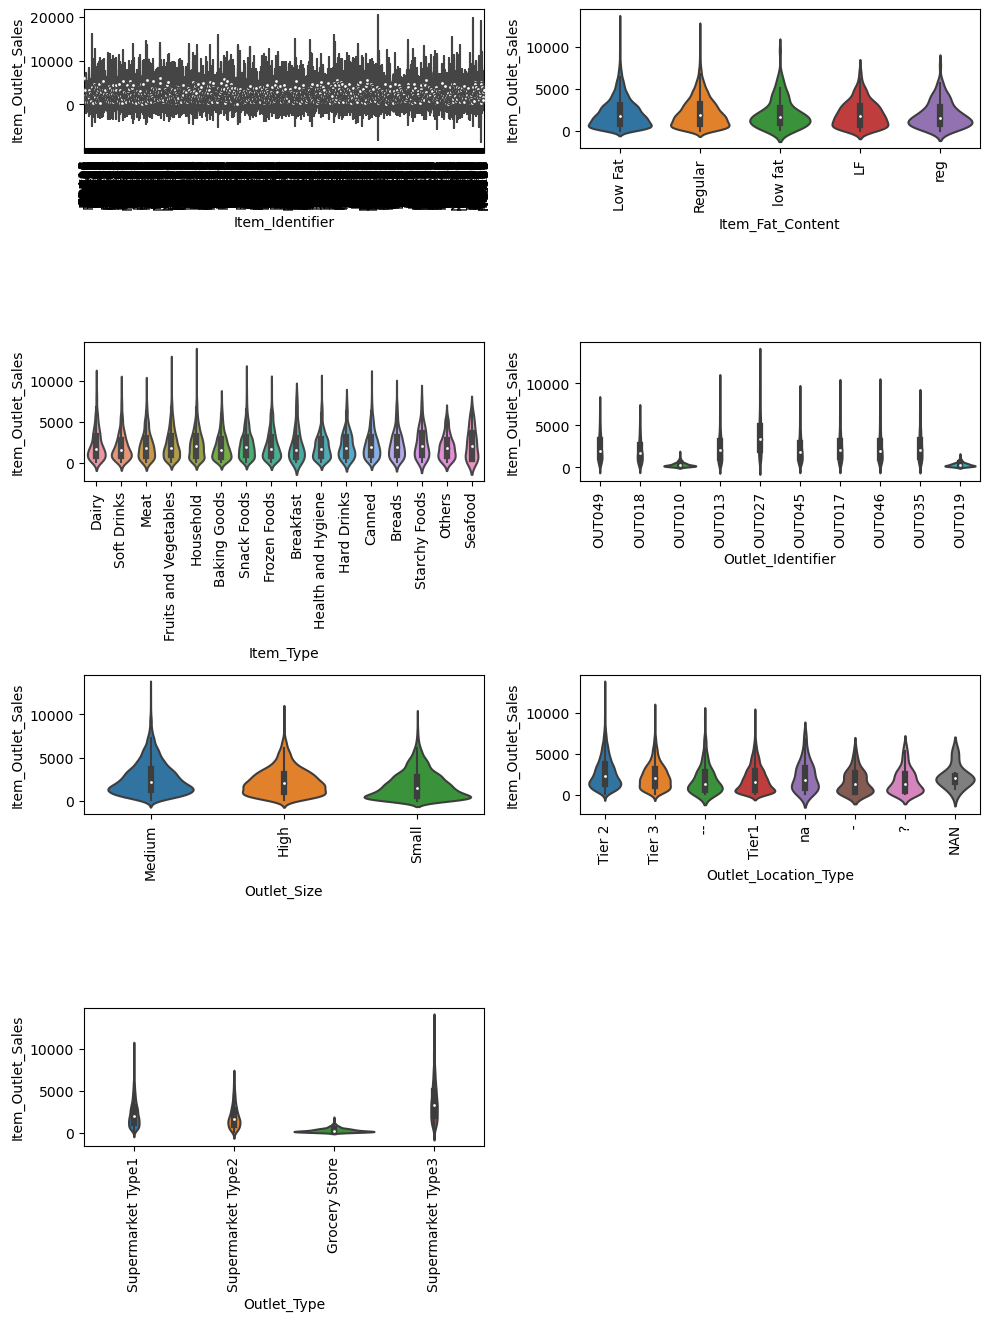

In [509]:
# Numeric vs Category
plt.figure(figsize=(10,15))
t=1
for i in df_cat:
    
    plt.subplot(5,2,t)
    sns.violinplot(y=df['Item_Outlet_Sales'],x=df_cat[i])
    plt.xticks(rotation=90)
    t+=1
    plt.tight_layout()

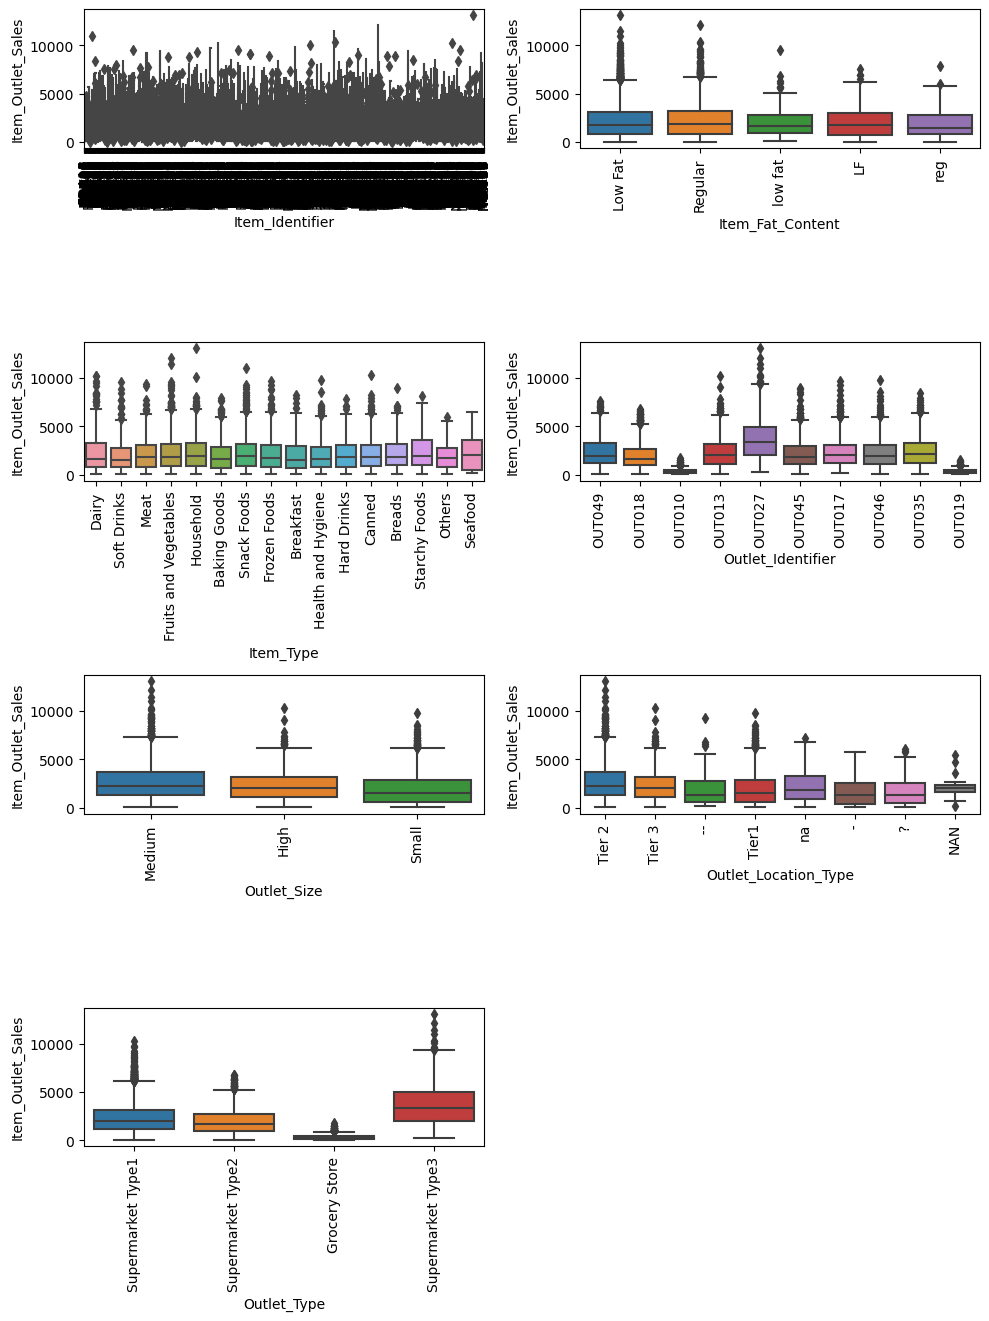

In [510]:
# Numeric vs Category
plt.figure(figsize=(10,15))
t=1
for i in df_cat:
    
    plt.subplot(5,2,t)
    sns.boxplot(y=df['Item_Outlet_Sales'],x=df_cat[i])
    plt.xticks(rotation=90)
    t+=1
    plt.tight_layout()

* Inferences:
    * Some columns have outliers which will be dealt later.
    

## Missing Value Treatment

In [511]:
#Finding out the missing values:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [512]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)[:3]  #Finding percent of missing values

Outlet_Size             28.276428
Outlet_Location_Type    24.052564
Item_Weight             17.165317
dtype: float64

#### Missing values in Item Weight, finding pattern with related columns.

In [513]:
# Feature Engineering on Item_Fat_Content to remove redundancies.
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat').replace('low fat','Low Fat').replace('reg','Regular')

In [514]:
df.groupby('Item_Fat_Content')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,4566.0,12.937387,4.653787,4.590,8.775,12.65,17.1,21.35
Regular,2494.0,12.711654,4.621851,4.555,8.770,12.50,16.7,21.20


In [515]:
df.groupby('Item_Type')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,536.0,12.277108,4.773622,4.880,8.23500,11.650,15.75,20.85
Breads,204.0,11.346936,4.440540,4.635,7.12875,10.600,14.85,20.85
Breakfast,89.0,12.768202,5.038131,6.425,8.06000,10.695,17.25,21.10
Canned,539.0,12.305705,4.586564,4.615,8.11500,12.150,16.25,21.35
Dairy,566.0,13.426069,4.686532,4.805,9.27750,13.350,17.60,20.70
Frozen Foods,718.0,12.867061,4.507383,4.555,8.93500,12.850,17.00,20.85
Fruits and Vegetables,1019.0,13.224769,4.575275,5.460,9.19500,13.100,17.10,21.35
Hard Drinks,183.0,11.400328,4.239144,4.610,8.26000,10.100,14.85,19.70
Health and Hygiene,430.0,13.142314,4.512313,5.175,9.69500,12.150,17.60,21.25


In [516]:
df.groupby('Item_Identifier')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Identifier,,,,,,,,
DRA12,6.0,11.600,0.000000e+00,11.600,11.600,11.600,11.600,11.600
DRA24,5.0,19.350,0.000000e+00,19.350,19.350,19.350,19.350,19.350
DRA59,6.0,8.270,1.945901e-15,8.270,8.270,8.270,8.270,8.270
DRB01,2.0,7.390,0.000000e+00,7.390,7.390,7.390,7.390,7.390
DRB13,5.0,6.115,0.000000e+00,6.115,6.115,6.115,6.115,6.115
...,...,...,...,...,...,...,...,...
NCZ30,6.0,6.590,9.729507e-16,6.590,6.590,6.590,6.590,6.590
NCZ41,5.0,19.850,0.000000e+00,19.850,19.850,19.850,19.850,19.850
NCZ42,5.0,10.500,0.000000e+00,10.500,10.500,10.500,10.500,10.500


In [517]:
#Finding out rows where item weight has missing values.
df.loc[df['Item_Weight'].isnull(),['Item_Weight','Item_Identifier','Item_Fat_Content','Item_Type']]

,Item_Weight,Item_Identifier,Item_Fat_Content,Item_Type
7,NaN,FDP10,Low Fat,Snack Foods
18,NaN,DRI11,Low Fat,Hard Drinks
21,NaN,FDW12,Regular,Baking Goods
23,NaN,FDC37,Low Fat,Baking Goods
29,NaN,FDC14,Regular,Canned
...,...,...,...,...
8485,NaN,DRK37,Low Fat,Soft Drinks
8487,NaN,DRG13,Low Fat,Soft Drinks
8488,NaN,NCN14,Low Fat,Others
8490,NaN,FDU44,Regular,Fruits and Vegetables


In [518]:
#Checking individual Item_Identifiers.
df[['Item_Weight','Item_Identifier','Item_Fat_Content']][df['Item_Identifier']=='FDP10']

,Item_Weight,Item_Identifier,Item_Fat_Content
7,NaN,FDP10,Low Fat
585,19.0,FDP10,Low Fat
2623,19.0,FDP10,Low Fat
3382,19.0,FDP10,Low Fat
4585,19.0,FDP10,Low Fat
6087,19.0,FDP10,Low Fat
7883,19.0,FDP10,Low Fat


In [519]:
df[['Item_Weight','Item_Identifier','Item_Fat_Content']][df['Item_Identifier']=='DRI11']

,Item_Weight,Item_Identifier,Item_Fat_Content
18,NaN,DRI11,Low Fat
1366,NaN,DRI11,Low Fat
3127,8.26,DRI11,Low Fat
5310,8.26,DRI11,Low Fat
7022,8.26,DRI11,Low Fat
7192,8.26,DRI11,Low Fat
8483,8.26,DRI11,Low Fat


* Observation:
    * It is visible that specific Item_Identifiers have specific Item_Weights
* Action:
    * We will impute the values in item weight pertaining to the specific Item_Identifiers.

In [520]:
df['Item_Weight']= df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x : x.fillna(x.median()))

In [521]:
# Checking if the imputation worked.
df[['Item_Weight','Item_Identifier','Item_Fat_Content']][df['Item_Identifier']=='FDP10']

,Item_Weight,Item_Identifier,Item_Fat_Content
7,19.0,FDP10,Low Fat
585,19.0,FDP10,Low Fat
2623,19.0,FDP10,Low Fat
3382,19.0,FDP10,Low Fat
4585,19.0,FDP10,Low Fat
6087,19.0,FDP10,Low Fat
7883,19.0,FDP10,Low Fat


In [522]:
#Rechecking for null Values:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [523]:
# Item Weight still has 4 null values.Finding out those null values.
df.loc[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9,OUT027,1985,Medium,Tier 2,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0,OUT027,1985,Medium,Tier 2,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,89.0,OUT027,1985,Medium,Tier 2,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2,OUT019,1985,Small,Tier1,Grocery Store,120.5098


In [524]:
# Since these are standalone Item_Identifiers we will impute the missing values with the median weight of the Item_Type they fall in.

In [525]:
df.loc[df['Item_Type']=='Frozen Foods','Item_Weight'].median()

12.85

In [526]:
df.loc[927,'Item_Weight']=12.85

In [527]:
df.loc[df['Item_Type']=='Snack Foods','Item_Weight'].median()

13.15

In [528]:
df.loc[1922,'Item_Weight']=13.15

In [529]:
df.loc[df['Item_Type']=='Dairy','Item_Weight'].median()

13.35

In [530]:
df.loc[4187,'Item_Weight']=13.35

In [531]:
df.loc[df['Item_Type']=='Baking Goods','Item_Weight'].median()

11.65

In [532]:
df.loc[5022,'Item_Weight']=11.65

In [533]:
df['Item_Weight'].isnull().sum()

0

* Missing values in Item_Weight dealt with.

#### Treating missing values in Outlet Size, finding pattern with related columns.

In [534]:
df.groupby('Outlet_Type')['Outlet_Size'].describe()

,count,unique,top,freq
Outlet_Type,,,,
Grocery Store,528,1,Small,528
Supermarket Type1,3722,3,Small,1860
Supermarket Type2,928,1,Medium,928
Supermarket Type3,935,1,Medium,935


In [535]:
#Treating Garbage Values.
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].replace('  -',np.nan).replace('  --',np.nan).replace('?',np.nan).replace('NAN',np.nan).replace('na',np.nan)

In [536]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].describe()

,count,unique,top,freq
Outlet_Location_Type,,,,
Tier 2,2793,1,Medium,2793
Tier 3,932,1,High,932
Tier1,2388,1,Small,2388


In [537]:
df.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].describe()

count unique     top  freq
Outlet_Type       Outlet_Location_Type                           
Grocery Store     Tier1                  528      1   Small   528
Supermarket Type1 Tier 2                 930      1  Medium   930
                  Tier 3                 932      1    High   932
                  Tier1                 1860      1   Small  1860
Supermarket Type2 Tier 2                 928      1  Medium   928
Supermarket Type3 Tier 2                 935      1  Medium   935

In [538]:
# We can see a clear relationship between the Location Type and the size of outlet.

In [539]:
df['Outlet_Size']= df.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x : x.fillna(x.mode()[0]))
    

In [540]:
df['Outlet_Size'].isnull().sum()

0

* Missing values in Outlet type has been dealt with.

#### Treating missing values in Outlet Location Type, finding pattern with related columns.

In [541]:
df.groupby('Outlet_Size')['Outlet_Location_Type'].describe()

,count,unique,top,freq
Outlet_Size,,,,
High,932,1,Tier 3,932
Medium,2793,1,Tier 2,2793
Small,2388,1,Tier1,2388


In [542]:
df['Outlet_Location_Type']= df.groupby('Outlet_Size')['Outlet_Location_Type'].apply(lambda x : x.fillna(x.mode()[0]))
    

In [543]:
df['Outlet_Location_Type'].isnull().sum()

0

* Missing values in Outlet_Location_Type has been dealt with.

In [544]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Outlier Treatment.


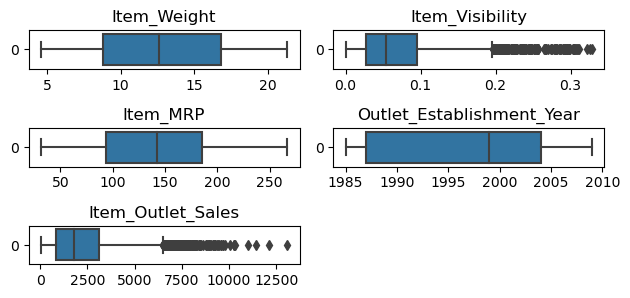

In [545]:
t=1
for i in df_num:
    plt.subplot(5,2,t)
    sns.boxplot(df_num[i],orient='h')
    t+=1
    plt.title(i)
    plt.tight_layout()

* Observations:
    * We have outliers in two columns namely Item_Visibility and Item_Outlet_Sales

In [546]:
df.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [547]:
# Dealing with Outliers using the Inter Quartile Range(IQR) method.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

In [548]:
Lower_Limit= Q1 - (1.5*IQR)
Upper_Limit= Q3 + (1.5*IQR)

In [549]:
#Removing outliers
df=df[~((df<( Lower_Limit)) | (df>(Upper_Limit))).any(axis=1)]

In [550]:
df.shape

(8193, 11)

## Scaling the data

In [551]:
# Numerical Variables
df_num=df.select_dtypes(include=np.number)
df_num

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8,3735.1380
1,5.920,0.019278,48.3,443.4228
2,17.500,0.016760,141.6,2097.2700
3,19.200,0.000000,182.1,732.3800
4,8.930,0.000000,53.9,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5,2778.3834
8519,8.380,0.046982,108.2,549.2850
8520,10.600,0.035186,85.1,1193.1136
8521,7.210,0.145221,103.1,1845.5976


In [552]:
#Calling the function
ss=StandardScaler()
scaled=ss.fit_transform(df_num)

In [553]:
df_scaled=pd.DataFrame(scaled,columns=df_num.columns)

In [594]:
df_scaled

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.770631,-1.019273,1.799396,1.096037
1,-1.498101,-0.949463,-1.476233,-1.096383
2,0.994239,-1.003872,0.040473,0.005148
3,1.360127,-1.366002,0.698850,-0.903926
4,-0.850265,-1.366002,-1.385198,-0.729206
...,...,...,...,...
8188,-1.294711,-0.139101,1.225552,0.458799
8189,-0.968640,-0.350867,-0.502485,-1.025875
8190,-0.490834,-0.605743,-0.878004,-0.597058
8191,-1.220457,1.771735,-0.585392,-0.162476


## Encoding categorical Variables

In [555]:
df_cat=df.select_dtypes(include='object')
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 2,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 2,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier1,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Small,Tier1,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier1,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 2,Supermarket Type2


###### Outlet_Size

In [556]:
df_cat['Outlet_Size'].value_counts()

Small     4600
Medium    2676
High       917
Name: Outlet_Size, dtype: int64

In [557]:
df_cat['Outlet_Size'].replace({'Medium':2,'Small':1,'High':3},inplace=True)

###### Item_Fat Content

In [558]:
Fat=df_cat['Item_Fat_Content'].value_counts(normalize=True).to_dict()

In [559]:
df_cat['Item_Fat_Content']=df_cat['Item_Fat_Content'].map(Fat)

###### Item_Type

In [560]:
df_cat['Item_Type'].value_counts()

Fruits and Vegetables    1175
Snack Foods              1154
Household                 877
Frozen Foods              830
Dairy                     649
Canned                    626
Baking Goods              622
Health and Hygiene        507
Soft Drinks               428
Meat                      409
Breads                    242
Hard Drinks               207
Others                    167
Starchy Foods             139
Breakfast                 101
Seafood                    60
Name: Item_Type, dtype: int64

In [561]:
# Binning
Veg=['Dairy','Fruits and Vegetables','Baking Goods','Snack Foods','Frozen Foods','Breakfast',
     'Canned','Breads','Starchy Foods']
Non_Veg = ['Meat','Seafood']
Drinks =['Soft Drinks','Hard Drinks']
others =['Health and Hygiene','Others']

In [562]:
# Defining a function
def food_type(x):
    if x in Veg:
        
        return('Veg')
    elif x in Non_Veg:
        return("Non_Veg")
    elif x in Drinks:
        return("Drinks")
    else:
        return("Others")
    

In [563]:
#Applying the function
df_cat['Item_Type']=df_cat['Item_Type'].apply(food_type)

###### Outlet_Identifier


In [564]:
outlet=df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].median().to_dict()


In [565]:
df_cat['Outlet_Identifier']=df['Outlet_Identifier'].map(outlet)

###### Outlet_Location_Type

In [566]:
olt=df_cat['Outlet_Location_Type'].value_counts(normalize=True).to_dict()
olt

{'Tier1': 0.5614549005248383,
 'Tier 2': 0.32662028560966677,
 'Tier 3': 0.11192481386549494}

In [567]:
df_cat['Outlet_Location_Type']=df_cat['Outlet_Location_Type'].map(olt)

In [568]:
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,0.647992,Veg,1957.4520,2,0.326620,Supermarket Type1
1,DRC01,0.352008,Drinks,1651.1840,2,0.326620,Supermarket Type2
2,FDN15,0.647992,Non_Veg,1957.4520,2,0.326620,Supermarket Type1
3,FDX07,0.352008,Veg,249.6750,1,0.561455,Grocery Store
4,NCD19,0.647992,Others,2014.7108,3,0.111925,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,0.647992,Veg,2014.7108,3,0.111925,Supermarket Type1
8519,FDS36,0.352008,Veg,1818.9656,1,0.561455,Supermarket Type1
8520,NCJ29,0.647992,Others,2090.9449,1,0.561455,Supermarket Type1
8521,FDN46,0.352008,Veg,1651.1840,2,0.326620,Supermarket Type2


###### Outlet Type

In [569]:
Ot=df_cat['Outlet_Type'].value_counts(normalize=True).to_dict()

In [570]:
df_cat['Outlet_Type']=df['Outlet_Type'].map(Ot)

###### Item Identifier

In [571]:
#Classifying the Identifiers according to the specidic category they fall in
df_cat['Item_Identifier'][0][:2]

'FD'

In [572]:
def func(x):
    return x[:2]

In [573]:
df_cat['Item_Identifier']=df_cat['Item_Identifier'].apply(func)

In [574]:
ii=df_cat['Item_Identifier'].value_counts(normalize=True).to_dict()
ii

{'FD': 0.7164652752349566,
 'NC': 0.18930794580739657,
 'DR': 0.09422677895764678}

In [575]:
df_cat['Item_Identifier']=df_cat['Item_Identifier'].map(ii)

In [480]:
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.716465,0.647992,Veg,1957.4520,2,0.326620,0.670939
1,0.094227,0.352008,Drinks,1651.1840,2,0.326620,0.112901
2,0.716465,0.647992,Non_Veg,1957.4520,2,0.326620,0.670939
3,0.716465,0.352008,Veg,249.6750,1,0.561455,0.114610
4,0.189308,0.647992,Others,2014.7108,3,0.111925,0.670939
...,...,...,...,...,...,...,...
8518,0.716465,0.647992,Veg,2014.7108,3,0.111925,0.670939
8519,0.716465,0.352008,Veg,1818.9656,1,0.561455,0.670939
8520,0.189308,0.647992,Others,2090.9449,1,0.561455,0.670939
8521,0.716465,0.352008,Veg,1651.1840,2,0.326620,0.112901


In [576]:
#Dummy Encoding
df_dumm=pd.get_dummies(df_cat['Item_Type'])

In [592]:
df_cat.drop('Item_Type',axis=1,inplace=True)

In [492]:
df_scaled.shape

(8193, 4)

In [588]:
df_cat.shape

(8193, 7)

In [581]:
df_dumm.shape

(8193, 4)

In [605]:
df_cat_concat=pd.concat([df_dumm,df_cat],axis=1)
df_cat_concat

,Drinks,Non_Veg,Others,Veg,Item_Identifier,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,0,0,1,0.716465,0.647992,1957.4520,2,0.326620,0.670939
1,1,0,0,0,0.094227,0.352008,1651.1840,2,0.326620,0.112901
2,0,1,0,0,0.716465,0.647992,1957.4520,2,0.326620,0.670939
3,0,0,0,1,0.716465,0.352008,249.6750,1,0.561455,0.114610
4,0,0,1,0,0.189308,0.647992,2014.7108,3,0.111925,0.670939
...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,1,0.716465,0.647992,2014.7108,3,0.111925,0.670939
8519,0,0,0,1,0.716465,0.352008,1818.9656,1,0.561455,0.670939
8520,0,0,1,0,0.189308,0.647992,2090.9449,1,0.561455,0.670939
8521,0,0,0,1,0.716465,0.352008,1651.1840,2,0.326620,0.112901


In [604]:
df_scaled

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.770631,-1.019273,1.799396,1.096037
1,-1.498101,-0.949463,-1.476233,-1.096383
2,0.994239,-1.003872,0.040473,0.005148
3,1.360127,-1.366002,0.698850,-0.903926
4,-0.850265,-1.366002,-1.385198,-0.729206
...,...,...,...,...
8188,-1.294711,-0.139101,1.225552,0.458799
8189,-0.968640,-0.350867,-0.502485,-1.025875
8190,-0.490834,-0.605743,-0.878004,-0.597058
8191,-1.220457,1.771735,-0.585392,-0.162476
